# Python可视化

## 1.直方图

In [1]:
#导入数据
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
cars=pd.read_csv(r'.\data\cars.csv')

In [2]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


## 运用matplotlib方式实现

In [2]:
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['Microsoft YaHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

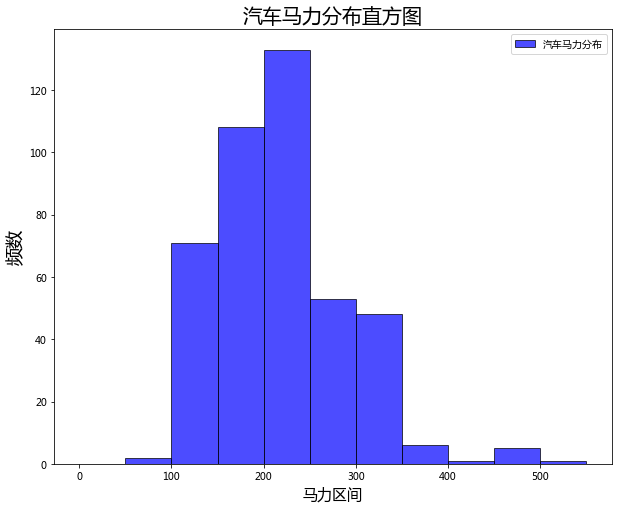

In [3]:
"""
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
density:是否归一化，0表示频率，1表示占比
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
bin = [0,50,100,150,200,250,300,350,400,450,500,550]

# 1)创建一个空白的画板
fig = plt.figure()

# 2)修改已创建画板的大小
fig.set_size_inches(10,8)


plt.hist(cars['Horsepower'], bins=bin, density=0,facecolor="blue", edgecolor="black", alpha=0.7,label='汽车马力分布')


# 显示横轴标签
plt.xlabel("马力区间",fontsize=15)
# 显示纵轴标签
plt.ylabel("频数",fontsize=18)
# 显示图标题
plt.title("汽车马力分布直方图",fontsize=20,fontweight='medium')
plt.legend(loc='upper right')
plt.show()

## 运用pyechars方式实现

In [5]:
import pyecharts
import numpy as np
bin = [0,50,100,150,200,250,300,350,400,450,500,550]
labels=['50','100','150','200','250','300','350','400','450','500','550']

data_cut=pd.cut(cars['Horsepower'],bin,labels=labels)

data_cut2=pd.value_counts(data_cut).sort_index()


In [40]:
bar = pyecharts.Bar('汽车马力--直方图')
bar.add(name='', x_axis =labels,y_axis =data_cut2 , bar_category_gap = 0)
bar.render('汽车马力--直方图.html')
bar

## 2.散点图

## 运用matplotlib方式实现

In [8]:
#数据预处理，去掉美金符号
cars['Invoice_new']=[float(x.replace(',','').strip('$')) for x in cars['Invoice'].tolist()]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


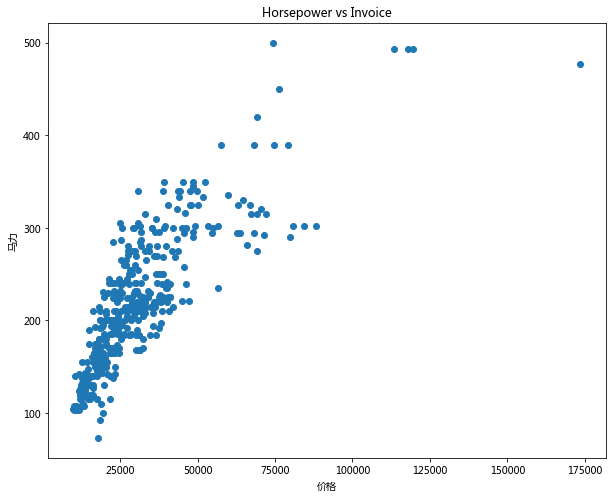

In [10]:
# 绘制散点图
fig = plt.figure()
fig.set_size_inches(10,8)
# 显示横轴标签
plt.xlabel("价格")
# 显示纵轴标签
plt.ylabel("马力")
# 显示图标题
plt.title("Horsepower vs Invoice")
ax = fig.add_subplot(111)
ax.scatter(cars['Invoice_new'],cars['Horsepower'])

## 运用pyechars方式实现

In [41]:
from pyecharts import Scatter

scatter = Scatter("散点图示例") 
scatter.add("Horsepower vs Invoice", cars['Invoice_new'] ,cars['Horsepower'])
scatter.render('散点图示例 Horsepower vs Invoice.html')
scatter

## 3.箱线图

## 运用matplotlib方式实现

In [21]:
cars_part=cars[cars['Make'].isin(['Chevrolet','Ford','BMW','Toyota'])]

In [22]:
# 根据不同厂商排序
cars_part.sort_values(by = 'Make', inplace=True)

# 通过for循环将不同商场车价放到price变量中
price = []
Levels = cars_part.Make.unique()
for new_class in Levels:
    price.append(cars_part.loc[cars.Make==new_class,'Invoice_new'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
price[:10]

[26    33873.0
 45    30110.0
 44    37575.0
 43    31065.0
 41    44170.0
 40    66830.0
 39    63190.0
 38    50270.0
 37    41170.0
 36    40530.0
 42    51815.0
 34    34115.0
 33    33890.0
 32    32525.0
 31    27745.0
 30    34800.0
 29    28245.0
 28    26155.0
 27    47720.0
 35    36620.0
 Name: Invoice_new, dtype: float64, 79    22222.0
 80    23954.0
 81    24518.0
 82    39068.0
 83    45193.0
 88    39306.0
 85    17070.0
 86    18480.0
 87    35399.0
 89    20394.0
 78    21551.0
 84    31689.0
 77    25672.0
 71    15357.0
 75    20026.0
 63    37422.0
 76    22931.0
 65    27479.0
 66    19108.0
 67    10965.0
 68    11802.0
 64    36287.0
 70    13884.0
 72    20095.0
 73    17434.0
 74    18639.0
 69    13697.0
 Name: Invoice_new, dtype: float64, 131    27756.0
 140    20457.0
 139    16375.0
 138    13717.0
 137    29405.0
 136    19490.0
 135    34483.0
 134    26875.0
 133    16943.0
 132    24498.0
 130    25105.0
 119    30468.0
 128    20857.0
 127    18881.0
 

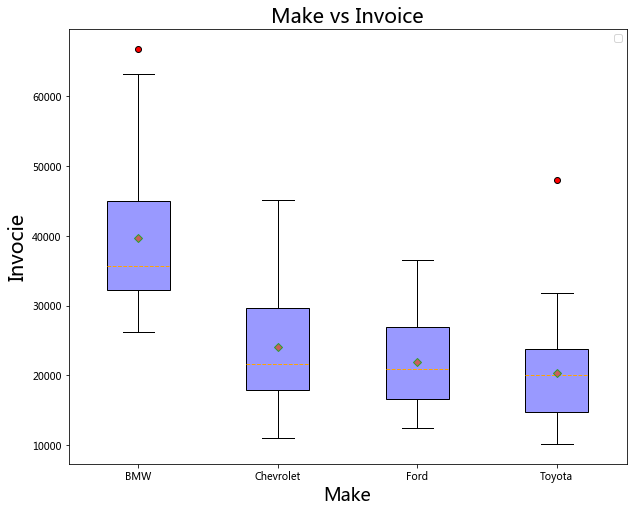

In [42]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
# 修改已创建画板的大小
fig.set_size_inches(10,8)
plt.boxplot(x = price,patch_artist=True,labels =Levels,showmeans=True,
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})
plt.xlabel('Make',fontsize=18)
plt.ylabel('Invocie',fontsize=20)
plt.title("Make vs Invoice",fontsize=20)
plt.legend(loc='upper right')
plt.show()

## 运用seaborn方式实现

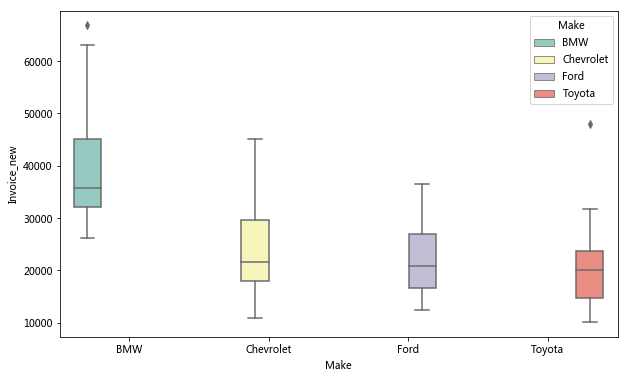

In [24]:
# library and dataset
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6)) 
# Grouped boxplot
sns.boxplot(x="Make", y="Invoice_new", hue="Make", data=cars_part, palette="Set3")

## 运用pyechars方式实现

In [43]:
from pyecharts import Boxplot

boxplot = Boxplot("不同制造商价格比对--箱形图")
x_axis = Levels
y_axis = price
_yaxis = boxplot.prepare_data(y_axis)       # 转换数据
boxplot.add("", x_axis, _yaxis, palette="Set1")

In [27]:
boxplot.render('不同制造商价格比对--箱形图.html')

# 报表图形

## 1.折线图

In [44]:
import pandas as pd
gnp=pd.read_csv(r'.\data\gnp.csv')

In [29]:
gnp.head()

,DATE,GNP,CONSUMP,INVEST,EXPORTS,GOVT
0,1960Q1,516.1,325.5,88.7,4.3,97.6
1,1960Q2,514.5,331.6,78.1,5.1,99.6
2,1960Q3,517.7,331.7,77.4,6.5,102.1
3,1960Q4,513.0,333.8,68.5,7.7,103.0
4,1961Q1,517.4,334.4,69.5,8.3,105.3


In [45]:
from pyecharts import Line

line = Line("上世纪国民生产总值")
line.add("U国家", gnp['DATE'],gnp['GNP']*2.3 , is_smooth=True,mark_point=["max","min"], mark_line=[ "average"], is_datazoom_show=True)
line.add("C国家", gnp['DATE'],gnp['GNP'] , is_smooth=True,mark_point=["max","min"], mark_line=[ "average"], is_datazoom_show=True)


In [33]:
line.render('上世纪国民生产总值.html')

In [46]:
#加载钻石数据集
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds.to_csv(r'.\data\diamond.csv')

## GIA COLOR SCALE
- GIA 的钻石成色等级是业内标准。 成色等级从字母 D（代表无色）开始 ，一直排列到字母 Z（浅黄色或褐色，颜色逐渐加深）。 每个字母等级都有明确界定的颜色外观范围。 通过在受控的照明和精确的观察条件下与比色石进行比对，对钻石颜色进行分级。

!['色泽分布'](GIAColorScale_2014_636x200.jpg)

In [35]:
diamonds_cnt=pd.DataFrame({'count' : diamonds.groupby(['color']).size()}).reset_index()
diamonds_cnt

,color,count
0,D,6775
1,E,9797
2,F,9542
3,G,11292
4,H,8304
5,I,5422
6,J,2808


## 2.饼图

In [47]:
from pyecharts import Pie

attr = diamonds_cnt['color']
v1 = diamonds_cnt['count']
pie = Pie("钻石色泽分布", title_pos='center')
pie.add(
    "",
    attr,
    v1,
    radius=[40, 75],
    label_text_color=None,
    is_label_show=True,
    legend_orient="vertical",
    legend_pos="left",
)


## 3.柱状图

In [48]:

diamonds_cnt2=pd.DataFrame({'count' : diamonds.groupby(['color']).size()}).reset_index()

In [49]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.core.display import HTML,display

In [50]:
def to_percent(y, position):
    s = str(100 * y)
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

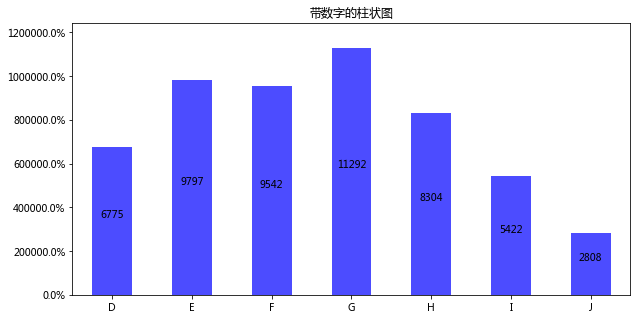

In [51]:
display(HTML('<h2>{col}</h2>'.format(col = '百分比柱状图结果')))
fig, ax = plt.subplots(figsize=(10, 5))
diamonds_cnt2['count'].plot(kind='bar',title='带数字的柱状图',color='blue',alpha=0.7,grid=False)
x_labels = list(diamonds_cnt2['color'])
ax.set_xticklabels(x_labels, rotation=0)
rects = ax.patches
labels = list(diamonds_cnt2['count'])
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/ 2, height/2, label, ha='center', va='bottom')
#可以设置y轴的上限，我这里设置为要画图的数据中的最大值+最大值/10    
yl = max(labels) + (max(labels) / 10)
plt.ylim(0, yl)
# y轴变成百分比
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show();

## 4.其他图形

### 水滴

In [52]:
from pyecharts import Liquid

liquid = Liquid("水滴图")
liquid.add("Liquid", [0.752])

### 仪表盘

In [53]:
#

from pyecharts import Gauge
gauge = Gauge("完成率")
gauge.add(
    "",
    "完成率",
    166.66,
    angle_range=[180, 0],
    scale_range=[0, 200],
    is_legend_show=False,
)

### Timeline

In [54]:
from pyecharts import Bar, Timeline
from random import randint

attr = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
bar_1 = Bar("2014 年销量", "")
bar_1.add("春季", attr, [randint(10, 100) for _ in range(6)])
bar_1.add("夏季", attr, [randint(10, 100) for _ in range(6)])
bar_1.add("秋季", attr, [randint(10, 100) for _ in range(6)])
bar_1.add("冬季", attr, [randint(10, 100) for _ in range(6)])

bar_2 = Bar("2015 年销量", "")
bar_2.add("春季", attr, [randint(10, 100) for _ in range(6)])
bar_2.add("夏季", attr, [randint(10, 100) for _ in range(6)])
bar_2.add("秋季", attr, [randint(10, 100) for _ in range(6)])
bar_2.add("冬季", attr, [randint(10, 100) for _ in range(6)])

bar_3 = Bar("2016 年销量", "")
bar_3.add("春季", attr, [randint(10, 100) for _ in range(6)])
bar_3.add("夏季", attr, [randint(10, 100) for _ in range(6)])
bar_3.add("秋季", attr, [randint(10, 100) for _ in range(6)])
bar_3.add("冬季", attr, [randint(10, 100) for _ in range(6)])

bar_4 = Bar("2017 年销量", "")
bar_4.add("春季", attr, [randint(10, 100) for _ in range(6)])
bar_4.add("夏季", attr, [randint(10, 100) for _ in range(6)])
bar_4.add("秋季", attr, [randint(10, 100) for _ in range(6)])
bar_4.add("冬季", attr, [randint(10, 100) for _ in range(6)])

bar_5 = Bar("2018 年销量", "")
bar_5.add("春季", attr, [randint(10, 100) for _ in range(6)])
bar_5.add("夏季", attr, [randint(10, 100) for _ in range(6)])
bar_5.add("秋季", attr, [randint(10, 100) for _ in range(6)])
bar_5.add("冬季", attr, [randint(10, 100) for _ in range(6)], is_legend_show=True)

timeline = Timeline(is_auto_play=True, timeline_bottom=0)
timeline.add(bar_1, '2014 年')
timeline.add(bar_2, '2015 年')
timeline.add(bar_3, '2016 年')
timeline.add(bar_4, '2017 年')
timeline.add(bar_5, '2018 年')

### 地图展示

In [55]:
from pyecharts import Geo
data = [
    ("海门", 9),("鄂尔多斯", 12),("招远", 12),("舟山", 12),("齐齐哈尔", 14),("盐城", 15),
    ("赤峰", 16),("青岛", 18),("乳山", 18),("金昌", 19),("泉州", 21),("莱西", 21),
    ("日照", 21),("胶南", 22),("南通", 23),("拉萨", 24),("云浮", 24),("梅州", 25),
    ("文登", 25),("上海", 25),("攀枝花", 25),("威海", 25),("承德", 25),("厦门", 26),
    ("汕尾", 26),("潮州", 26),("丹东", 27),("太仓", 27),("曲靖", 27),("烟台", 28),
    ("福州", 29),("瓦房店", 30),("即墨", 30),("抚顺", 31),("玉溪", 31),("张家口", 31),
    ("阳泉", 31),("莱州", 32),("湖州", 32),("汕头", 32),("昆山", 33),("宁波", 33),
    ("湛江", 33),("揭阳", 34),("荣成", 34),("连云港", 35),("葫芦岛", 35),("常熟", 36),
    ("东莞", 36),("河源", 36),("淮安", 36),("泰州", 36),("南宁", 37),("营口", 37),
    ("惠州", 37),("江阴", 37),("蓬莱", 37),("韶关", 38),("嘉峪关", 38),("广州", 38),
    ("延安", 38),("太原", 39),("清远", 39),("中山", 39),("昆明", 39),("寿光", 40),
    ("盘锦", 40),("长治", 41),("深圳", 41),("珠海", 42),("宿迁", 43),("咸阳", 43),
    ("铜川", 44),("平度", 44),("佛山", 44),("海口", 44),("江门", 45),("章丘", 45),
    ("肇庆", 46),("大连", 47),("临汾", 47),("吴江", 47),("石嘴山", 49),("沈阳", 50),
    ("苏州", 50),("茂名", 50),("嘉兴", 51),("长春", 51),("胶州", 52),("银川", 52),
    ("张家港", 52),("三门峡", 53),("锦州", 54),("南昌", 54),("柳州", 54),("三亚", 54),
    ("自贡", 56),("吉林", 56),("阳江", 57),("泸州", 57),("西宁", 57),("宜宾", 58),
    ("呼和浩特", 58),("成都", 58),("大同", 58),("镇江", 59),("桂林", 59),("张家界", 59),
    ("宜兴", 59),("北海", 60),("西安", 61),("金坛", 62),("东营", 62),("牡丹江", 63),
    ("遵义", 63),("绍兴", 63),("扬州", 64),("常州", 64),("潍坊", 65),("重庆", 66),
    ("台州", 67),("南京", 67),("滨州", 70),("贵阳", 71),("无锡", 71),("本溪", 71),
    ("克拉玛依", 72),("渭南", 72),("马鞍山", 72),("宝鸡", 72),("焦作", 75),("句容", 75),
    ("北京", 79),("徐州", 79),("衡水", 80),("包头", 80),("绵阳", 80),("乌鲁木齐", 84),
    ("枣庄", 84),("杭州", 84),("淄博", 85),("鞍山", 86),("溧阳", 86),("库尔勒", 86),
    ("安阳", 90),("开封", 90),("济南", 92),("德阳", 93),("温州", 95),("九江", 96),
    ("邯郸", 98),("临安", 99),("兰州", 99),("沧州", 100),("临沂", 103),("南充", 104),
    ("天津", 105),("富阳", 106),("泰安", 112),("诸暨", 112),("郑州", 113),("哈尔滨", 114),
    ("聊城", 116),("芜湖", 117),("唐山", 119),("平顶山", 119),("邢台", 119),("德州", 120),
    ("济宁", 120),("荆州", 127),("宜昌", 130),("义乌", 132),("丽水", 133),("洛阳", 134),
    ("秦皇岛", 136),("株洲", 143),("石家庄", 147),("莱芜", 148),("常德", 152),("保定", 153),
    ("湘潭", 154),("金华", 157),("岳阳", 169),("长沙", 175),("衢州", 177),("廊坊", 193),
    ("菏泽", 194),("合肥", 229),("武汉", 273),("大庆", 279)]

geo = Geo(
    "全国主要城市空气质量",
    "data from pm2.5",
    title_color="#fff",
    title_pos="center",
    width=1200,
    height=600,
    background_color="#404a59",
)
attr, value = geo.cast(data)
geo.add(
    "",
    attr,
    value,
    visual_range=[0, 200],
    visual_text_color="#fff",
    symbol_size=10,
    is_visualmap=True,
    is_piecewise=True,
    visual_split_number=6,
)

In [56]:
geo.render('全国主要城市空气质量.html')

## 5.Pivot Table

In [57]:
import pandas as pd
import numpy as np

cars_df = pd.read_csv(r'.\data\cars.csv')
cars_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [58]:
#数据预处理，去掉美金符号
cars_df['Invoice_new']=[float(x.replace(',','').strip('$')) for x in cars['Invoice']]

In [59]:
# 我们想要比较不同年份的不同厂商的车，在电池方面的不同
cars_df.pivot_table(values='Invoice_new', index='Make', columns='Origin', aggfunc=np.mean,margins=True)

Origin,Asia,Europe,USA,All
Make,,,,
Acura,38590.857143,NaN,NaN,38590.857143
Audi,NaN,39330.105263,NaN,39330.105263
BMW,NaN,39620.650000,NaN,39620.650000
Buick,NaN,NaN,27854.888889,27854.888889
Cadillac,NaN,NaN,46426.875000,46426.875000
Chevrolet,NaN,NaN,24060.814815,24060.814815
Chrysler,NaN,NaN,25270.066667,25270.066667
Dodge,NaN,NaN,24160.076923,24160.076923
Ford,NaN,NaN,21953.000000,21953.000000
